### Correlaciones

En este Notebook vamos a analizar las relaciones entre las variables para la predicción del precio de la electricidad horario en España.

El periodo de predicción va a ser de 2020 a abril de 2021

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pmdarima.arima import ndiffs, nsdiffs
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from dateutil.relativedelta import relativedelta
from metricas import mae, mape, rmse
import plotly.graph_objects as go


import warnings
warnings.simplefilter("ignore")

# Mostramos las versiones de los módulos para posibles reproducciones del código

print('Versión pandas:', pd.__version__)
print('Versión numpy:', np.__version__)
print('Versión matplotlib:', matplotlib.__version__)
print('Version statsmodels', sm.__version__)

Versión pandas: 1.0.5
Versión numpy: 1.19.5
Versión matplotlib: 3.2.2
Version statsmodels 0.12.2


### Lectura del dataframe horario

In [2]:
df = pd.read_csv('Data/datos_horarios_prediccion_electricidad.csv', index_col = 0)

df.index = pd.to_datetime(df.index)


### Correlaciones con todos los datos

Hasta día de hoy

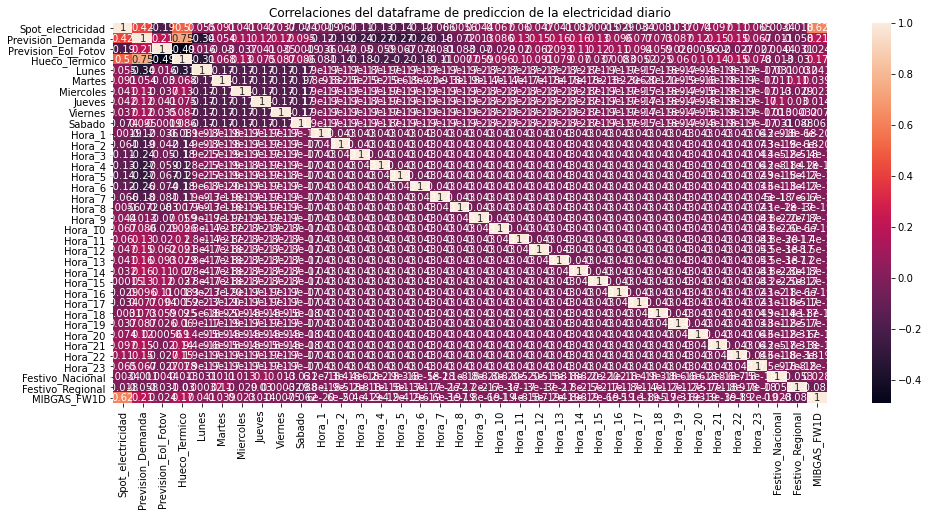

In [3]:
plt.figure(figsize = (16,7))
ax = sns.heatmap(df.loc["2019"].corr(), annot=True)
plt.title('Correlaciones del dataframe de prediccion de la electricidad diario')
plt.show()

### Correlaciones hasta 2020 (inclusive)

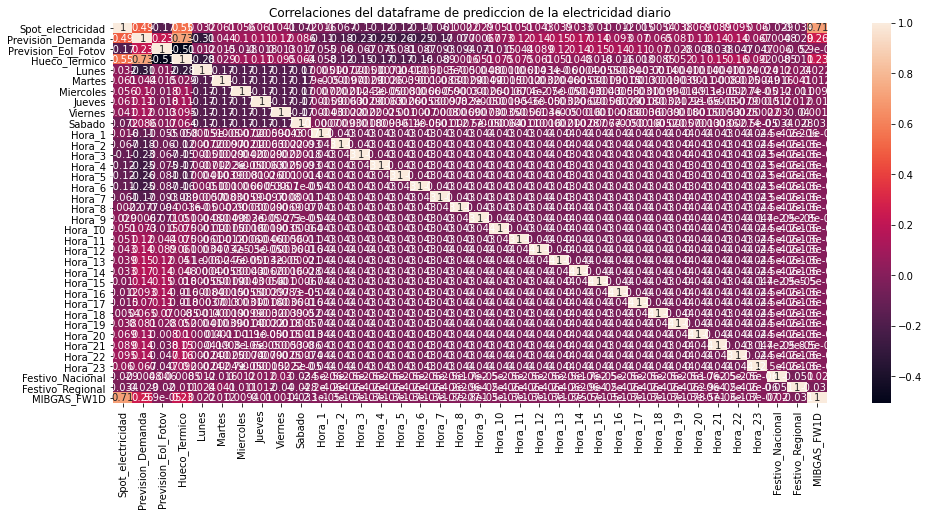

In [4]:
plt.figure(figsize = (16,7))
ax = sns.heatmap(df.loc[:"2020"].corr(), annot=True)
plt.title('Correlaciones del dataframe de prediccion de la electricidad diario')
plt.show()

Aquí notamos la gran diferencia que ha existido en la predicción de la electricidad.

Vemos que hasta 2020, el Hueco Térmico es una variable muy importante, pero a partir de ahí, pierde todo su peso y basa a estar dominada por el MIBGAS, que a su vez está relacionado con el BRENT y otras variables que no se usan por multicolinealidad.

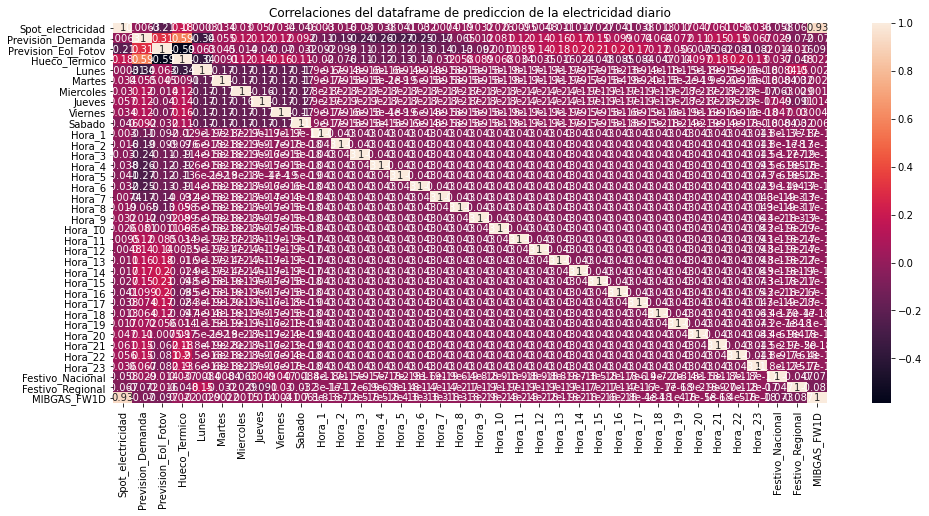

In [5]:
plt.figure(figsize = (16,7))
ax = sns.heatmap(df.loc["2021"].corr(), annot=True)
plt.title('Correlaciones del dataframe de prediccion de la electricidad diario')
plt.show()

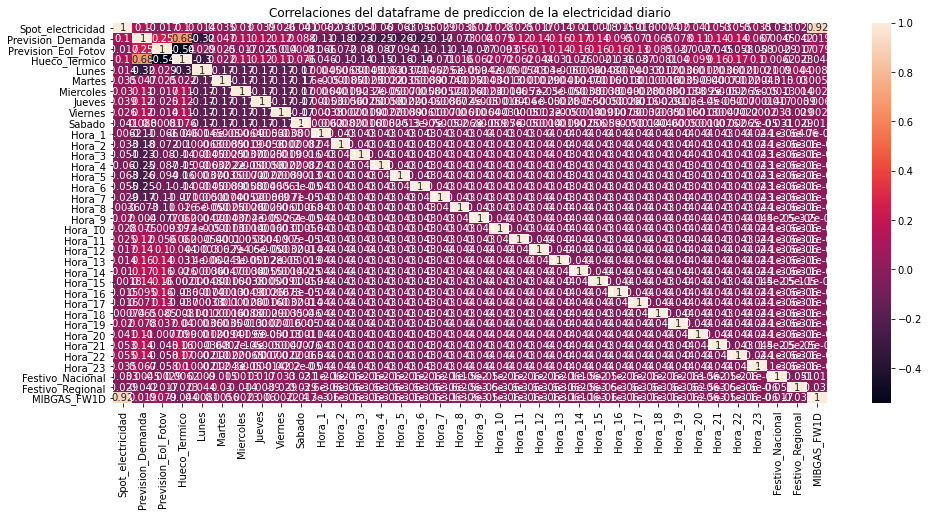

In [6]:
plt.figure(figsize = (16,7))
ax = sns.heatmap(df.corr(), annot=True)
plt.title('Correlaciones del dataframe de prediccion de la electricidad diario')
plt.show()

### Estudio de la serie del precio de la electricidad

In [7]:
time_series = df.Spot_electricidad.copy()
time_series = time_series.loc["2020":"2021-04"]
fig = go.Figure()
fig.add_trace(go.Scatter(x= time_series.index.tolist(),y=time_series,
                    mode='lines',
                    name='Real'))

fig.show()

Diferencia regular: 0
Diferencia estacional: 0


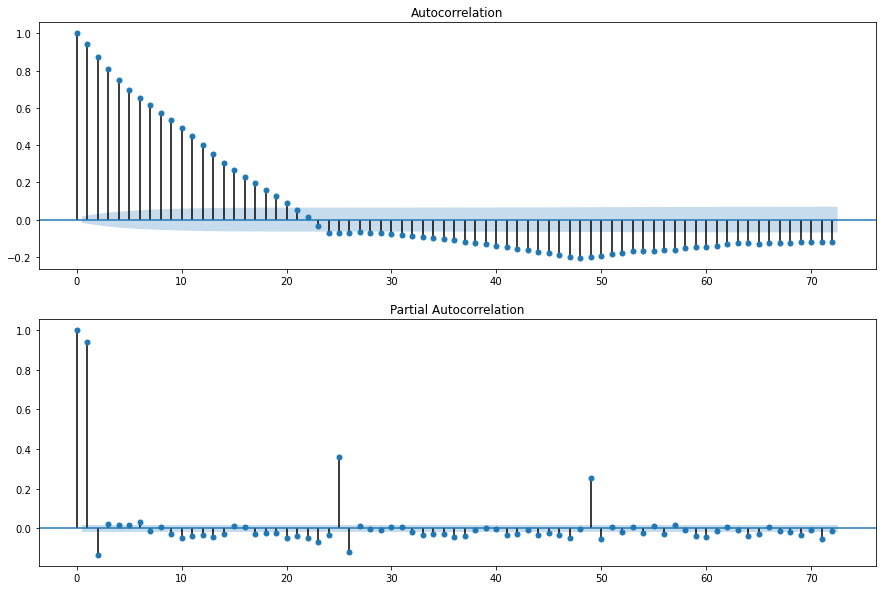

In [8]:
# No piden diferencias estacionales ni regulares ni los residuos ni la serie diaria

y = time_series.copy()
y = y.diff(24).dropna()

print('Diferencia regular:', ndiffs(y, alpha = 0.05, test = 'adf'))
print('Diferencia estacional:', nsdiffs(y, m = 24, test = 'ocsb'))

nlags = 72 # play with this parameter

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(y, lags = nlags,  ax=ax[0])
plot_pacf(y, lags = nlags, method="ols",ax=ax[1])
plt.show()